In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(["Name","Ticket","Fare","Cabin","SibSp","Parch"],inplace=True, axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,NaN,S
889,890,1,1,male,26.0,C


In [4]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
Embarked        True
dtype: bool

In [5]:
df['Age'] = df['Age'].replace(np.nan,np.round(df['Age'].mean()))
df

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,30.0,S
889,890,1,1,male,26.0,C


In [6]:
df['Sex'] = df['Sex'].replace("male",1)
df['Sex'] = df['Sex'].replace("female",0)
df

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,S
1,2,1,1,0,38.0,C
2,3,1,3,0,26.0,S
3,4,1,1,0,35.0,S
4,5,0,3,1,35.0,S
...,...,...,...,...,...,...
886,887,0,2,1,27.0,S
887,888,1,1,0,19.0,S
888,889,0,3,0,30.0,S
889,890,1,1,1,26.0,C


In [7]:
df["Embarked"].fillna(df['Embarked'].mode(),inplace=True)

In [8]:
np.where(df.isnull())

(array([ 61, 829], dtype=int64), array([5, 5], dtype=int64))

In [9]:
x = df.drop(columns = ['Survived',"PassengerId"])
y = df['Survived']

In [10]:
x.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df["Dummy"] = df.Embarked.map({'S':0,"C":1,"Q":2,np.nan:0})
df

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Dummy
0,1,0,3,1,22.0,S,0
1,2,1,1,0,38.0,C,1
2,3,1,3,0,26.0,S,0
3,4,1,1,0,35.0,S,0
4,5,0,3,1,35.0,S,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,S,0
887,888,1,1,0,19.0,S,0
888,889,0,3,0,30.0,S,0
889,890,1,1,1,26.0,C,1


In [12]:
x = df.drop(columns = ['Survived',"Embarked","PassengerId"])
y = df['Survived']

In [13]:
x["Embarked"] = x["Dummy"]
x

,Pclass,Sex,Age,Dummy,Embarked
0,3,1,22.0,0,0
1,1,0,38.0,1,1
2,3,0,26.0,0,0
3,1,0,35.0,0,0
4,3,1,35.0,0,0
...,...,...,...,...,...
886,2,1,27.0,0,0
887,1,0,19.0,0,0
888,3,0,30.0,0,0
889,1,1,26.0,1,1


In [14]:
x.drop(["Dummy"],axis=1,inplace=True)

In [15]:
x['Age'] = StandardScaler().fit_transform(x['Age'].values.reshape(-1, 1))
x

NameError: name 'StandardScaler' is not defined

In [16]:
x.isnull().any()

Pclass      False
Sex         False
Age         False
Embarked    False
dtype: bool

In [17]:
x["Embarked"]

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [18]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\hp\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state= 43)

In [21]:
rand_clf = RandomForestClassifier(random_state=6)

In [22]:
clf = DecisionTreeClassifier( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
clf.score(x_test,y_test)

0.7821229050279329

In [24]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
clf2.score(x_test,y_test)

0.7821229050279329

In [26]:
rand_clf = RandomForestClassifier(random_state=6)

In [27]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [28]:
rand_clf.score(x_test,y_test)

0.7821229050279329

In [29]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [368]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [369]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=6,
                                   

In [391]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 90}

In [33]:
rand_clf = RandomForestClassifier(criterion= 'gini',
 max_depth = 8,
 max_features = 'auto',
 min_samples_leaf = 6,
 min_samples_split= 2,
 n_estimators = 90,random_state=6)


In [34]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [35]:
rand_clf.score(x_test,y_test)

0.776536312849162

In [36]:
x_test

,Pclass,Sex,Age,Embarked
770,3,1,24.0,0
853,1,0,16.0,0
144,2,1,18.0,0
141,3,0,22.0,0
261,3,1,3.0,0
...,...,...,...,...
71,3,0,16.0,0
423,3,0,28.0,0
342,2,1,28.0,0
825,3,1,30.0,2


In [37]:
x

,Pclass,Sex,Age,Embarked
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,0
4,3,1,35.0,0
...,...,...,...,...
886,2,1,27.0,0
887,1,0,19.0,0
888,3,0,30.0,0
889,1,1,26.0,1


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
# Create param grid.

param_grid ={'penalty' : ['l1', 'l2','elasticnet'],
    'C' : np.logspace(-5, 8, 15),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    

# Create grid search object

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)



In [57]:
# Fit on data

best_clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    6.9s finished
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [61]:
best_clf.best_params_

{'C': 0.05179474679231213, 'penalty': 'l2', 'solver': 'sag'}

In [66]:
best_clf.score(x_test,y_test)

0.7932960893854749

In [46]:
rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 10, 
                                       min_samples_split = 20,   
                                       n_estimators=90, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=6, 
                                       n_jobs=-1)



In [47]:
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=True, random_state=6, verbose=0,
                       warm_start=False)

In [48]:
rf.score(x_test,y_test)

0.7988826815642458

In [64]:
from sklearn.ensemble import BaggingClassifier

bag_knn = BaggingClassifier(LogisticRegression(C= 0.05179474679231213, penalty= 'l2', solver= 'sag')) 

In [65]:
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

0.7932960893854749

In [724]:
df1=pd.read_csv("test.csv")

In [725]:
df1.drop(["PassengerId","Name","SibSp","Parch","Ticket","Fare","Cabin"],axis=1,inplace=True)
df1

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
...,...,...,...,...
413,3,male,NaN,S
414,1,female,39.0,C
415,3,male,38.5,S
416,3,male,NaN,S


In [726]:
df1["Age"].fillna(30,inplace=True)
df1

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
...,...,...,...,...
413,3,male,30.0,S
414,1,female,39.0,C
415,3,male,38.5,S
416,3,male,30.0,S


In [727]:
df1["Embarked"].fillna(df1['Embarked'].mode(),inplace=True)

In [728]:
df1.isnull().any()

Pclass      False
Sex         False
Age         False
Embarked    False
dtype: bool

In [729]:
df1["Embarked"].replace('S',0,inplace=True)
df1["Embarked"].replace('C',1,inplace=True)
df1["Embarked"].replace('Q',2,inplace=True)

In [730]:
df1["Sex"].replace('male',1,inplace=True)
df1["Sex"].replace('female',0,inplace=True)
df1

,Pclass,Sex,Age,Embarked
0,3,1,34.5,2
1,3,0,47.0,0
2,2,1,62.0,2
3,3,1,27.0,0
4,3,0,22.0,0
...,...,...,...,...
413,3,1,30.0,0
414,1,0,39.0,1
415,3,1,38.5,0
416,3,1,30.0,0


In [731]:
df1["Age"] = df1["Age"].astype(int)

In [732]:
x_new = df1
x_new

,Pclass,Sex,Age,Embarked
0,3,1,34,2
1,3,0,47,0
2,2,1,62,2
3,3,1,27,0
4,3,0,22,0
...,...,...,...,...
413,3,1,30,0
414,1,0,39,1
415,3,1,38,0
416,3,1,30,0


In [733]:
x_new['Age'] = StandardScaler().fit_transform(x_new['Age'].values.reshape(-1, 1))
x_new

,Pclass,Sex,Age,Embarked
0,3,1,0.301339,2
1,3,0,1.329905,0
2,2,1,2.516711,2
3,3,1,-0.252504,0
4,3,0,-0.648106,0
...,...,...,...,...
413,3,1,-0.015143,0
414,1,0,0.696941,1
415,3,1,0.617821,0
416,3,1,-0.015143,0


In [734]:
best_clf.predict(x_new)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [735]:
LF["lf"] = best_clf.predict(x_new)

In [736]:
LF["lf"].value_counts()

0    288
1    130
Name: lf, dtype: int64

In [463]:
rf

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [466]:
LF = pd.DataFrame()
LF["lf"] = lf
LF["rf"] = rf
LF

,lf,rf
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [467]:
LF["lf"].value_counts()

0    257
1    161
Name: lf, dtype: int64

In [468]:
LF["rf"].value_counts()

0    270
1    148
Name: rf, dtype: int64

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
df

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,S
1,2,1,1,0,38.0,C
2,3,1,3,0,26.0,S
3,4,1,1,0,35.0,S
4,5,0,3,1,35.0,S
...,...,...,...,...,...,...
886,887,0,2,1,27.0,S
887,888,1,1,0,19.0,S
888,889,0,3,0,30.0,S
889,890,1,1,1,26.0,C


In [19]:
x = df.drop(['Survived','PassengerId'],axis=1)
y = df['Survived']

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\hp\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

In [173]:
rand_clf = RandomForestClassifier(random_state=6)

In [174]:
clf = DecisionTreeClassifier( min_samples_split= 2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [175]:
clf.score(x_test,y_test)

0.7798507462686567

In [176]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [177]:
clf2.score(x_test,y_test)

0.7798507462686567

In [178]:
rand_clf = RandomForestClassifier(random_state=6)

In [179]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [180]:
rand_clf.score(x_test,y_test)

0.7313432835820896

In [181]:
rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 6,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 7,
 n_estimators = 130,random_state=6)

In [182]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [183]:
rand_clf.score(x_test,y_test)

0.7910447761194029

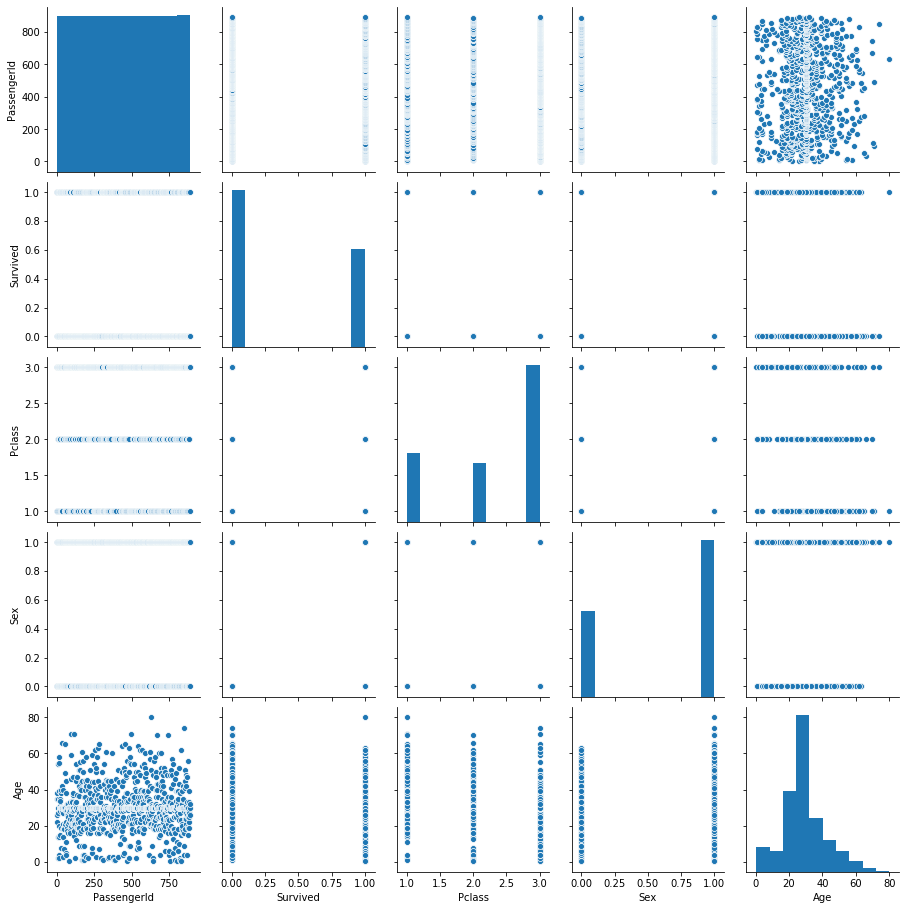

In [34]:
import seaborn as sns
sns.pairplot(df)

In [484]:
df_final = pd.DataFrame()

df_final["PassengerId"] = list(range(892,1310))

In [485]:
df_final["Survived"] = best_clf.predict(x_new)

In [486]:
df_final["Survived"].value_counts()

0    305
1    113
Name: Survived, dtype: int64

In [473]:
LF['rf'].value_counts()

0    270
1    148
Name: rf, dtype: int64

In [487]:
df_final.to_csv('test_survived.csv', index=False)

In [488]:
s = pd.read_csv("test_survived.csv")
s

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
